In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

# Daltonisme bayésien

Environ 8% des hommes et 0.5% des femmes sont, à des degrés divers, daltoniens.

## Question 1

Calculer le pourcentage de femmes parmi les daltoniens (en ajoutant une hypothèse a priori que vous préciserez)

g = Genre

D = Daltonisme

P(g/D) = P(g,D)/P(D) = P(D/g).P(g)/P(D) = P(D/g).P(g)/(P(D/g=h).P(g=h)+P(D/g=f).P(g=f))

avec:

P(D=1/g=h) = 0.08

P(D=1/g=f) = 0.005

on a besoin ds probas a priori :

P(g=h) = 0.48

p(g=f) = 0.52

donc 

P(g=f/D=1) = P(D=1/g=f).P(g=f)/(P(D=1/g=h).P(g=h)+P(D=1/g=f).P(g=f)) = 0.005\*0.52/(0.08\*0.48+0.005\*0.52)

In [36]:
p = 0.005*0.52/(0.08*0.48+0.005*0.52)
print('P(g=f/D=1)=',p)

# on verifie les 

# definition des variables
genre = gum.LabelizedVariable("G","genre",0).addLabel("H").addLabel("F")
dalton = gum.LabelizedVariable("D","daltonisme",0).addLabel("O").addLabel("N")
# definition dees probabilités
pDsG = gum.Potential().add(dalton).add(genre).fillWith([0.08,0.92,0.005,0.995])
pG = gum.Potential().add(genre).fillWith([0.48,0.52])
pGetD = pDsG*pG
print(pretty_cpt(pDsG))
print(pretty_cpt(pG))
print(pretty_cpt(pGetD))

# on va marginaliser et sommer :
pD = pGetD.margSumOut(["G"]) # en paramètre, on met la liste des variables a marginaliser
print(pretty_cpt(pD))

# proba a posteriori
pGsD = pDsG*pG/pD
print(pretty_cpt(pGsD))

P(g=f/D=1)= 0.06341463414634148
   |---------------|
---|       D       |
 G |   O      N    |
---|---------------|
 H | 0.0800 0.9200 |
 F | 0.0050 0.9950 |
---|---------------|
|---------------|
|       G       |
|   H      F    |
|---------------|
| 0.4800 0.5200 |
|---------------|
   |---------------|
---|       G       |
 D |   H      F    |
---|---------------|
 O | 0.0384 0.0026 |
 N | 0.4416 0.5174 |
---|---------------|
|---------------|
|       D       |
|   O      N    |
|---------------|
| 0.0410 0.9590 |
|---------------|
   |---------------|
---|       D       |
 G |   O      N    |
---|---------------|
 H | 0.9366 0.4605 |
 F | 0.0634 0.5395 |
---|---------------|


## Question 2

Construire le réseau bayésien qui représente ce problème et vérifier cette valeur par propagation.

inferences :


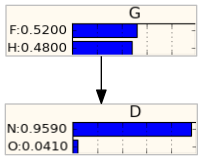

inferences sachant D=1


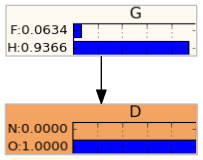

inferences du reseau renversé :


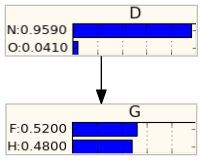

In [42]:
# definition du réseau
bn = gum.BayesNet()
g = bn.add(genre)
d = bn.add(dalton)
bn.addArc(g,d)
import pyAgrum.lib.notebook as nb
nb.showBN(bn)
# definition des tables de probabilités 
bn.cpt(g).fillWith([0.48,0.52])

bn.cpt(d)[{"G": "H"}] = [0.08, 0.92]
bn.cpt(d)[{"G": "F"}] = [0.005, 0.995]

# calcul des probabilités
print("inferences :")
gnb.showInference(bn)

print("inferences sachant D=1 :")
gnb.showInference(bn,evs={"D":"O"}) # calculer l'inference sachant que je suis daltonien (D=O)
# 'evs' à traduire par 'observation'

# on aurait pu definir l'arc dans l'autre sens, et remplir les cpt avec les bonnes valeurs : on peut demander
# à Agrum de retouner l'arc et de calculer les inferences :
print("inferences du reseau renversé :")
bn.reverseArc(g,d)
gnb.showInference(bn)

